<a href="https://colab.research.google.com/github/chunsubin/soong2/blob/master/%5B%EC%B5%9C%EC%A2%85%5D_%EA%B0%95%EC%95%84%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import tensorflow as tf
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')
os.environ['KAGGLE_USERNAME']='chunsoobin' # 캐글 ID
os.environ["KAGGLE_KEY"]='6538033abecc5452c40357454426664e'   # API TOKEN
!kaggle competitions download -c dog-breed-identification

362848256/362841195 [==============================] - 10s 0us/step
  0% 0.00/48.4k [00:00<?, ?B/s]
100% 48.4k/48.4k [00:00<00:00, 51.4MB/s]
  0% 0.00/34.4k [00:00<?, ?B/s]
100% 34.4k/34.4k [00:00<00:00, 70.0MB/s]
  0% 0.00/47.0k [00:00<?, ?B/s]
100% 47.0k/47.0k [00:00<00:00, 47.1MB/s]
  0% 0.00/81.2k [00:00<?, ?B/s]
100% 81.2k/81.2k [00:00<00:00, 81.8MB/s]
  0% 0.00/43.8k [00:00<?, ?B/s]
100% 43.8k/43.8k [00:00<00:00, 43.7MB/s]
  0% 0.00/5.61k [00:00<?, ?B/s]
100% 5.61k/5.61k [00:00<00:00, 5.26MB/s]
  0% 0.00/30.1k [00:00<?, ?B/s]
100% 30.1k/30.1k [00:00<00:00, 31.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.2MB/s]
  0% 0.00/19.6k [00:00<?, ?B/s]
100% 19.6k/19.6k [00:00<00:00, 18.4MB/s]
  0% 0.00/53.5k [00:00<?, ?B/s]
100% 53.5k/53.5k [00:00<00:00, 54.1MB/s]
  0% 0.00/40.1k [00:00<?, ?B/s]
100% 40.1k/40.1k [00:00<00:00, 39.4MB/s]
  0% 0.00/25.8k [00:00<?, ?B/s]
100% 25.8k/25.8k [00:00<00:00, 20.8MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<

In [ ]:
!unzip train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816

In [ ]:
# 8.23 텐서플로우 허브에서 사전 훈련된 Inception V3의 특징 추출기 불러오기
import tensorflow_hub as hub

inception_url = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'
feature_model = tf.keras.Sequential([
    hub.KerasLayer(inception_url, output_shape=(2048,), trainable=False)
])
feature_model.build([None, 299, 299, 3])
feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# 예제 8.10  
import pandas as pd
label_text = pd.read_csv('labels.csv')
print(label_text.head())
label_text['breed'].nunique()

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


120

In [ ]:
# 8.24 ImageDataGenerator가 처리할 수 있는 하위 디렉토리 구조로 데이터 복사
import os
import shutil
if os.path.exists('/content/train_sub/') == False:
  os.mkdir('/content/train_sub/')

for i in range(len(label_text)):
    if os.path.exists('/content/train_sub/' + label_text.loc[i]['breed']) == False:
      os.mkdir('/content/train_sub/' + label_text.loc[i]['breed'])
    shutil.copy('/content/train/' + label_text.loc[i]['id'] + '.jpg', '/content/train_sub/' + label_text.loc[i]['breed'])

In [ ]:
# 8.17 train 라벨 데이터를 메모리에 로드
import numpy as np
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]
train_Y = np.array(train_Y)

In [ ]:
# 8.25 ImageDataGenerator를 이용한 train/validation 데이터 분리, Image Augmentation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

image_size = 224 # 이미지 사이즈가 299에서 224로 바뀌었습니다.
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.25)
valid_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = train_datagen.flow_from_directory(directory="/content/train_sub/", subset="training", batch_size=batch_size, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))
valid_generator = valid_datagen.flow_from_directory(directory="/content/train_sub/", subset="validation", batch_size=1, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))

Found 7718 images belonging to 120 classes.
Found 2504 images belonging to 120 classes.


In [ ]:
# 8.26 train 데이터를 특징 벡터로 변환
batch_step = (7718 * 3) // batch_size
train_features = []
train_Y = []
for idx in range(batch_step):
    if idx % 100 == 0:
        print(idx)
    x, y = train_generator.next()
    train_Y.extend(y)
    
    feature = feature_model.predict(x)
    train_features.extend(feature)

train_features = np.array(train_features)
train_Y = np.array(train_Y)
print(train_features.shape)
print(train_Y.shape)

0
100
200
300
400
500
600
700
(23084, 2048)
(23084, 120)


In [ ]:
# 8.27 validation 데이터를 특징 벡터로 변환
valid_features = []
valid_Y = []

for idx in range(valid_generator.n):
  if idx%100==0:
    print(idx)
  x,y = valid_generator.next()
  valid_Y.extend(y)

  feature = feature_model.predict(x)
  valid_features.extend(feature)

valid_features = np.array(valid_features)
valid_Y = np.array(valid_Y)
print(valid_features.shape)
print(valid_Y.shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2504, 2048)
(2504, 120)


In [ ]:
# 8.28 분류를 위한 작은 Sequential 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(2048,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='softmax')
])

model.compile(tf.optimizers.RMSprop(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 555,384
Trainable params: 555,384
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
722/722 [==============================] - 6s 8ms/step - loss: 0.5196 - accuracy: 0.8401 - val_loss: 0.6627 - val_accuracy: 0.8111
Epoch 2/10
722/722 [==============================] - 6s 8ms/step - loss: 0.4910 - accuracy: 0.8477 - val_loss: 0.6558 - val_accuracy: 0.8087
Epoch 3/10
722/722 [==============================] - 6s 8ms/step - loss: 0.4615 - accuracy: 0.8537 - val_loss: 0.6798 - val_accuracy: 0.8067
Epoch 4/10
722/722 [==============================] - 6s 8ms/step - loss: 0.4368 - accuracy: 0.8624 - val_loss: 0.6805 - val_accuracy: 0.8091
Epoch 5/10
722/722 [==============================] - 6s 8ms/step - loss: 0.4179 - accuracy: 0.8678 - val_loss: 0.6877 - val_accuracy: 0.8055
Epoch 6/10
722/722 [==============================] - 6s 9ms/step - loss: 0.3995 - accuracy: 0.8741 - val_loss: 0.6762 - val_accuracy: 0.8087
Epoch 7/10
722/722 [==============================] - 6s 9ms/step - loss: 0.3858 - accuracy: 0.8778 - val_loss: 0.6869 - val_accuracy: 0.8099
Epoch 

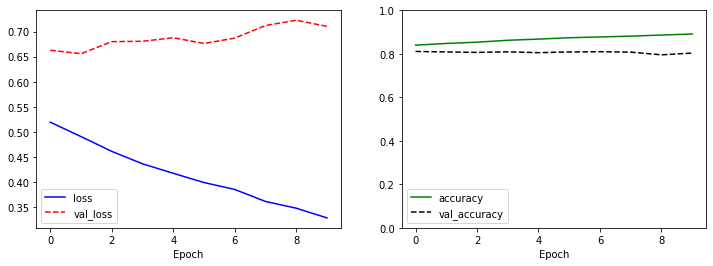

In [ ]:
# 8.29 분류를 위한 작은 Sequential 모델 학습
history = model.fit(train_features, train_Y, validation_data=(valid_features, valid_Y), epochs=10, batch_size=32)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend()

plt.show()

In [ ]:
# 8.30 라벨 텍스트를 알파벳 순으로 정렬
unique_sorted_Y = sorted(unique_Y)
print(unique_sorted_Y)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

NameError: ignored

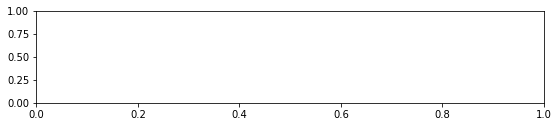

In [ ]:
# 8.31 Inception V3 특징 추출기-Sequential 모델의 분류 라벨 확인
import matplotlib.pyplot as plt
import random
import cv2

plt.figure(figsize=(20,20))
  
for c in range(5):
    # 이미지 표시
    plt.subplot(10,2,c*2+1)
    plt.imshow(plt.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg'))
    plt.title(mydog_text['breed'][c])
    plt.axis('off')
    idx = mydog_text['id'][c]
    idx = unique_sorted_Y.index(real_y)
    
    # 예측값 표시
    plt.subplot(10,2,c*2+2)
    img = cv2.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg')
    img = cv2.resize(img, dsize=(299, 299))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Inception V3를 이용한 특징 벡터 추출
    feature_vector = feature_model.predict(img)
    
    # Sequential 모델을 이용한 예측
    prediction = model.predict(feature_vector)[0]
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [unique_sorted_Y[index] for index in top_5_predict]
    color = ['gray'] * 5
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])

## 내가 저장한 사진 다섯ㄱ

In [ ]:
from google.colab.patches import cv2_imshow  
from google.colab import drive
drive.mount('/content/gdrive')
mydog_text = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/my_dog_labels.csv")
mydog_X=[]
tmp = r'/content/gdrive/MyDrive/Colab Notebooks/my_dogs/'

Mounted at /content/gdrive


In [ ]:
import cv2
for i in range(5):
  tmp2 = tmp+str(i+1)+'.'+str(mydog_text['breed'][i])+'.jpg'
  imgtmp = cv2.imread(tmp2)
  img = cv2.resize(imgtmp, dsize=(224,224)) #,interpolation=cv2.IMREAD_UNCHANGED
  img=img/255.0
  mydog_X.append(img)

mydog_X=np.array(mydog_X)  

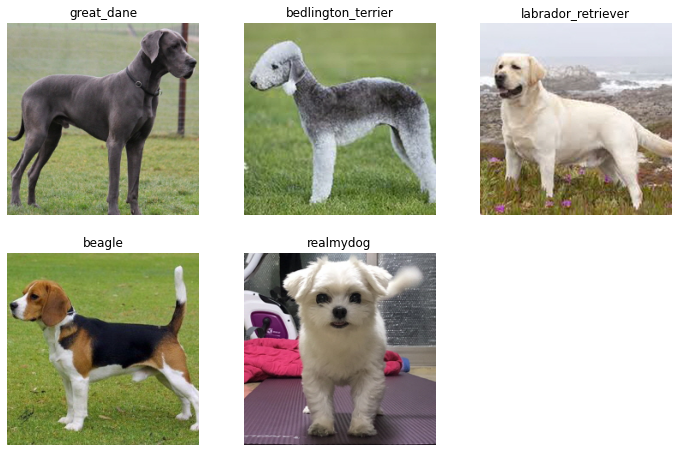

In [ ]:
plt.figure(figsize=(12,12))
for c in range(5):
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg'))
  plt.title(mydog_text['breed'][c])
  plt.axis('off')

plt.show()

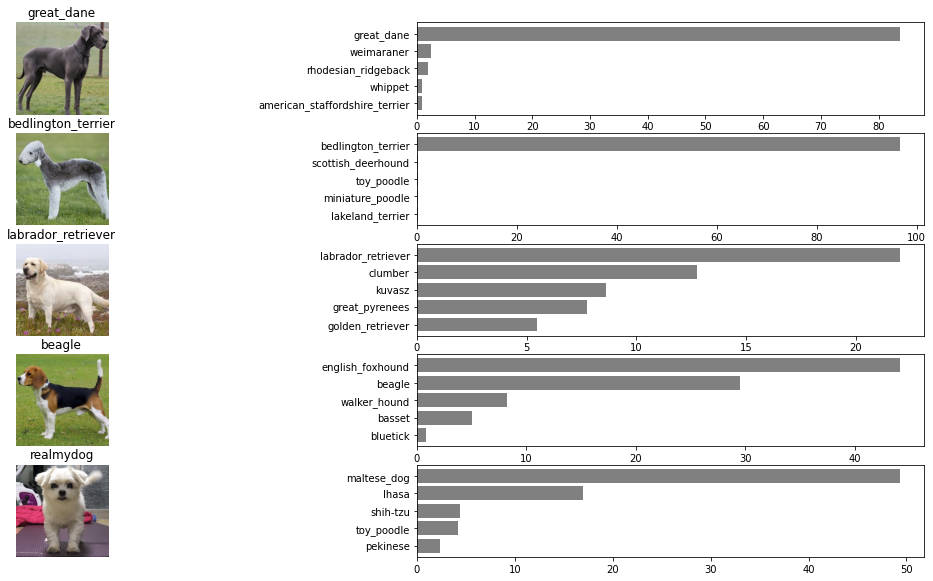

In [ ]:
# 8.31 Inception V3 특징 추출기-Sequential 모델의 분류 라벨 확인
import matplotlib.pyplot as plt
import random
import cv2

plt.figure(figsize=(20,20))
  
for c in range(5):
    # 이미지 표시
    plt.subplot(10,2,c*2+1)
    plt.imshow(plt.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg'))
    plt.title(mydog_text['breed'][c])
    plt.axis('off')
    idx = mydog_text['id'][c]
    idx = c+1
    
    # 예측값 표시
    plt.subplot(10,2,c*2+2)
    img = cv2.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg')
    img = cv2.resize(img, dsize=(299, 299))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Inception V3를 이용한 특징 벡터 추출
    feature_vector = feature_model.predict(img)
    
    # Sequential 모델을 이용한 예측
    prediction = model.predict(feature_vector)[0]
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [unique_sorted_Y[index] for index in top_5_predict]
    color = ['gray'] * 5
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])

In [ ]:
# 8.21 Dogs Dataset 학습을 위한 Transfer Learning 모델 정의
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

# 뒤에서 20개까지의 레이어는 훈련 가능, 나머지는 가중치 고정
for layer in model.layers[:-20]:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # 라벨이 원-핫 인코딩을 사용하기 때문에 sparse가 아닌 categorical_crossentropy를 사용합니다.
model.summary()

14540800/14536120 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10
241/241 [==============================] - 538s 2s/step - loss: 3.1455 - accuracy: 0.3293 - val_loss: 1.5781 - val_accuracy: 0.5511
Epoch 2/10
241/241 [==============================] - 531s 2s/step - loss: 1.5460 - accuracy: 0.6184 - val_loss: 1.2434 - val_accuracy: 0.6222
Epoch 3/10
241/241 [==============================] - 528s 2s/step - loss: 1.1958 - accuracy: 0.6846 - val_loss: 1.0900 - val_accuracy: 0.6721
Epoch 4/10
241/241 [==============================] - 531s 2s/step - loss: 1.0134 - accuracy: 0.7347 - val_loss: 1.0846 - val_accuracy: 0.6701
Epoch 5/10
241/241 [==============================] - 534s 2s/step - loss: 0.9051 - accuracy: 0.7519 - val_loss: 1.0347 - val_accuracy: 0.6917
Epoch 6/10
241/241 [==============================] - 531s 2s/step - loss: 0.8386 - accuracy: 0.7681 - val_loss: 0.9883 - val_accuracy: 0.7029
Epoch 7/10
241/241 [==============================] - 530s 2s/step - loss: 0.7404 - accuracy: 0.7994 - val_loss: 0.9815 - val_accuracy: 0.7105

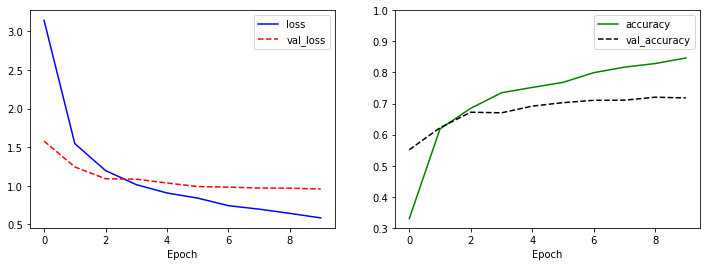

In [ ]:
# 8.22 모델 학습 및 결과 확인
# history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)
steps_per_epoch = int(7718/32) # generator를 사용하기 때문에 1epoch 당 학습할 step수를 정합니다. batch_size인 32로 train_data의 크기를 나눠주면 됩니다.
history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=10, steps_per_epoch=steps_per_epoch) # model.fit_generator()를 사용합니다.

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.3, 1)
plt.legend()

plt.show()

ValueError: ignored

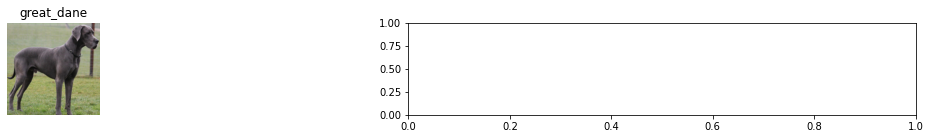

In [ ]:
# 8.31 Inception V3 특징 추출기-Sequential 모델의 분류 라벨 확인
import matplotlib.pyplot as plt
import random
import cv2

plt.figure(figsize=(20,20))
  
for c in range(5):
    # 이미지 표시
    plt.subplot(10,2,c*2+1)
    plt.imshow(plt.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg'))
    plt.title(mydog_text['breed'][c])
    plt.axis('off')
    idx = mydog_text['id'][c]
    idx = c+1
    
    # 예측값 표시
    plt.subplot(10,2,c*2+2)
    img = cv2.imread(tmp+str(c+1)+'.'+str(mydog_text['breed'][c])+'.jpg')
    img = cv2.resize(img, dsize=(299, 299))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Inception V3를 이용한 특징 벡터 추출
    feature_vector = feature_model.predict(img)
    
    # Sequential 모델을 이용한 예측
    prediction = model.predict(feature_vector)[0]
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [unique_sorted_Y[index] for index in top_5_predict]
    color = ['gray'] * 5
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])